**850, 500, 300 mb Stream Line and Wind Speed Field**

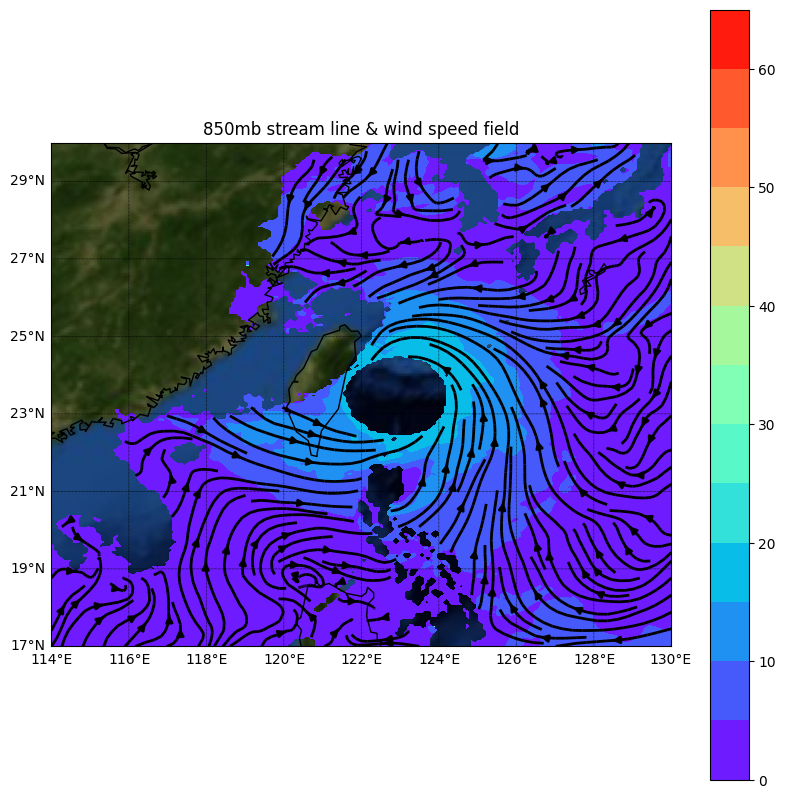

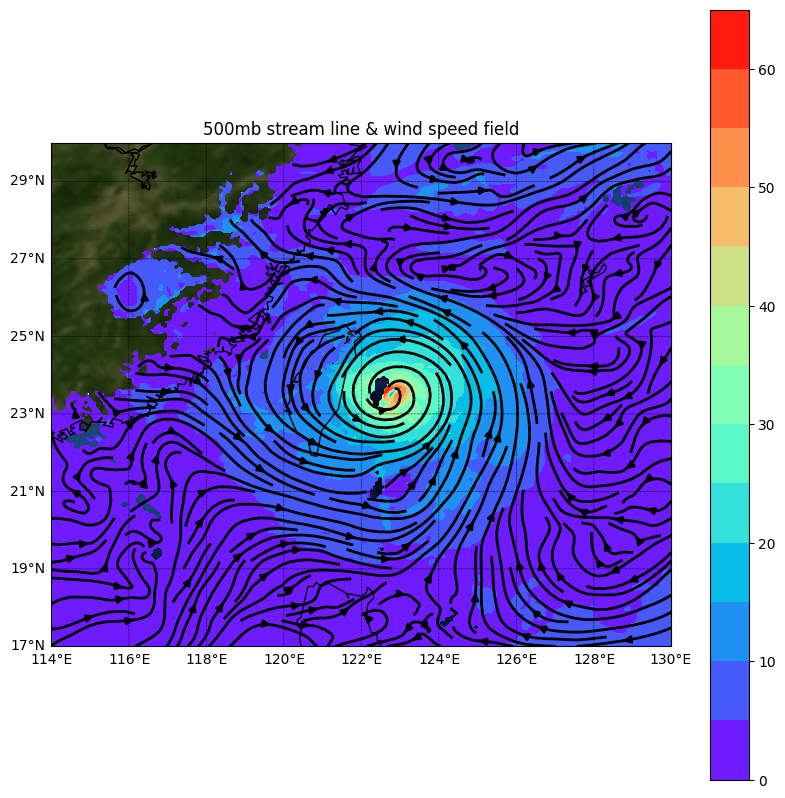

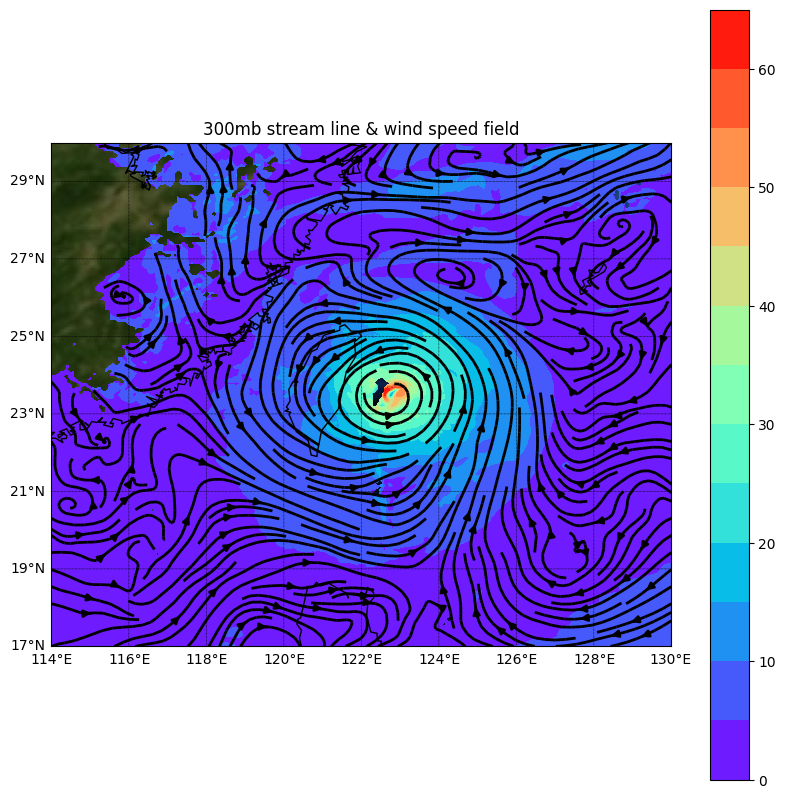

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

class WindVisualization:

    def __init__(self, file_name, lat_range, lon_range, height_levels, heights):

        self.file_name = file_name
        self.lat_range = lat_range
        self.lon_range = lon_range
        self.height_levels = height_levels
        self.heights = heights
        self.h = [2, 6, 8]
        
        self.data = None
        self.u = None
        self.v = None
        self.w = None
        self.t = None

    def load_data(self):

        data = np.fromfile(self.file_name, dtype='>f4')
        self.data = data.reshape(4, self.height_levels, 252, 252)
        self.u = np.array(self.data[0])
        self.v = np.array(self.data[1])
        self.w = np.array(self.data[2])
        self.t = np.array(self.data[3])

    def replace_above_threshold(self, matrix, threshold):

        mask = matrix > threshold
        matrix[mask] = np.nan

        return matrix

    def preprocess_data(self, threshold=10 ** 10):

        self.u = self.replace_above_threshold(self.u, threshold)
        self.v = self.replace_above_threshold(self.v, threshold)
        self.w = self.replace_above_threshold(self.w, threshold)
        self.t = self.replace_above_threshold(self.t, threshold)

    def plot_wind_speed_field(self, lonx, laty):

        for i in range(len(self.h)):
            fig = plt.figure(figsize=(10, 10))
            ax = fig.add_subplot(1, 1, 1)
            m = Basemap(projection='cyl', resolution='l', llcrnrlon=self.lon_range[0], llcrnrlat=self.lat_range[0],
                        urcrnrlon=self.lon_range[1], urcrnrlat=self.lat_range[1])
            m.drawcoastlines()
            m.bluemarble()
            m.drawparallels(np.arange(self.lat_range[0], self.lat_range[1]+1, 2), labels=[1, 0, 0, 0], linewidth=0.5)
            m.drawmeridians(np.arange(self.lon_range[0], self.lon_range[1]+1, 2), labels=[0, 0, 0, 1], linewidth=0.5)
            m.streamplot(lonx, laty, self.u[i,:,:], self.v[i,:,:], linewidth=2, density=2, color="black")
            m.contourf(lonx, laty, self.u[i, :, :], cmap='rainbow', latlon=True)
            level = np.linspace(0, 65, 14)
            z = (self.u[i, :, :] ** 2 + self.v[i, :, :] ** 2) ** 0.5
            m.contourf(lonx, laty, z, level, cmap='rainbow', latlon=True)
            plt.colorbar()
            plt.grid("--")
            plt.title(str(self.heights[self.h[i]]) + "mb stream line & wind speed field")
            # plt.savefig(f"./imgs/stream_line_WS_field/{str(self.heights[i])}mb_stream_line_wind_speed_field.jpg", dpi=600)
            
            plt.show()

def main():
    file_name = './data/fanapid.dat'
    lat_range = [17, 30]
    lon_range = [114, 130]
    height_levels = 10
    heights = [1000, 900, 850, 800, 700, 600, 500, 400, 300, 250]

    data_viz = WindVisualization(file_name, lat_range, lon_range, height_levels, heights)
    data_viz.load_data()
    data_viz.preprocess_data()
    lon = np.linspace(lon_range[0], lon_range[1], 252)
    lat = np.linspace(lat_range[0], lat_range[1], 252)
    lonx, laty = np.meshgrid(lon, lat, indexing='xy')
    data_viz.plot_wind_speed_field(lonx, laty)

if __name__ == '__main__':
    main()


**850, 500, 300 mb Wind Field and Vertical Velocity**

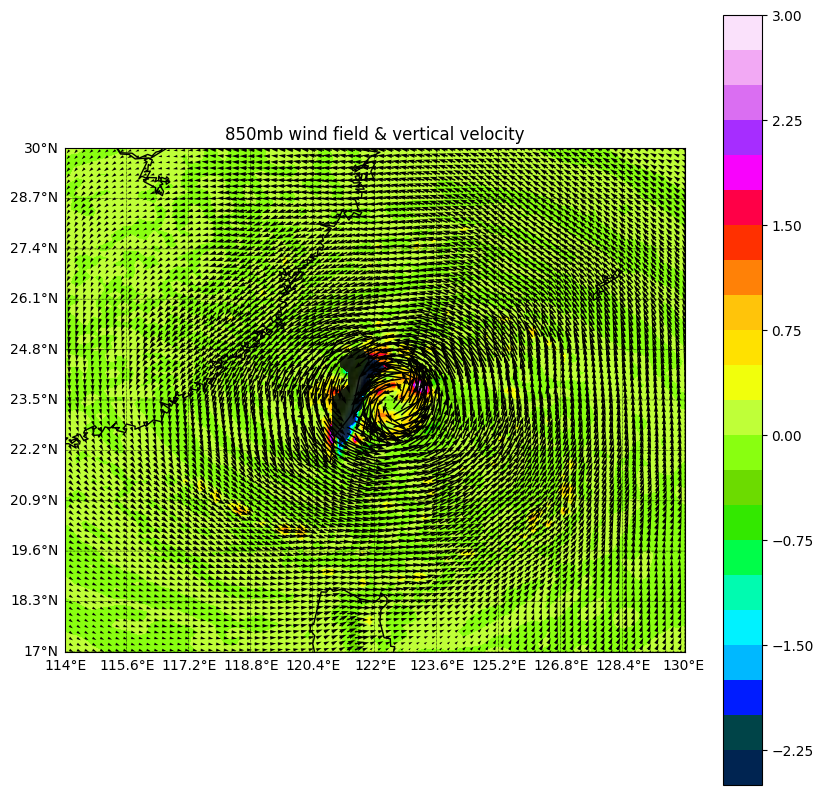

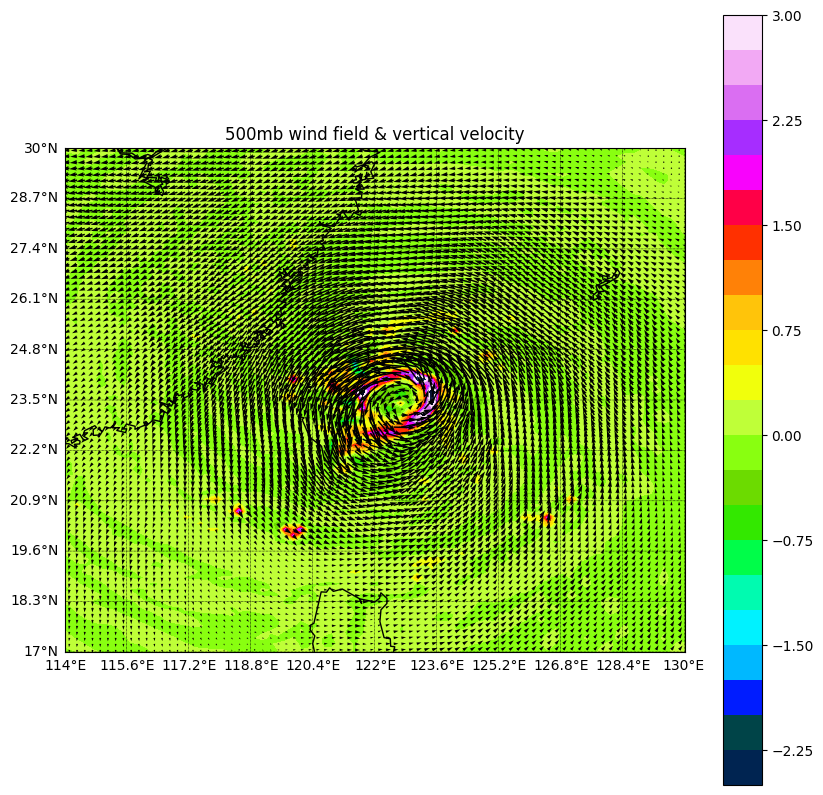

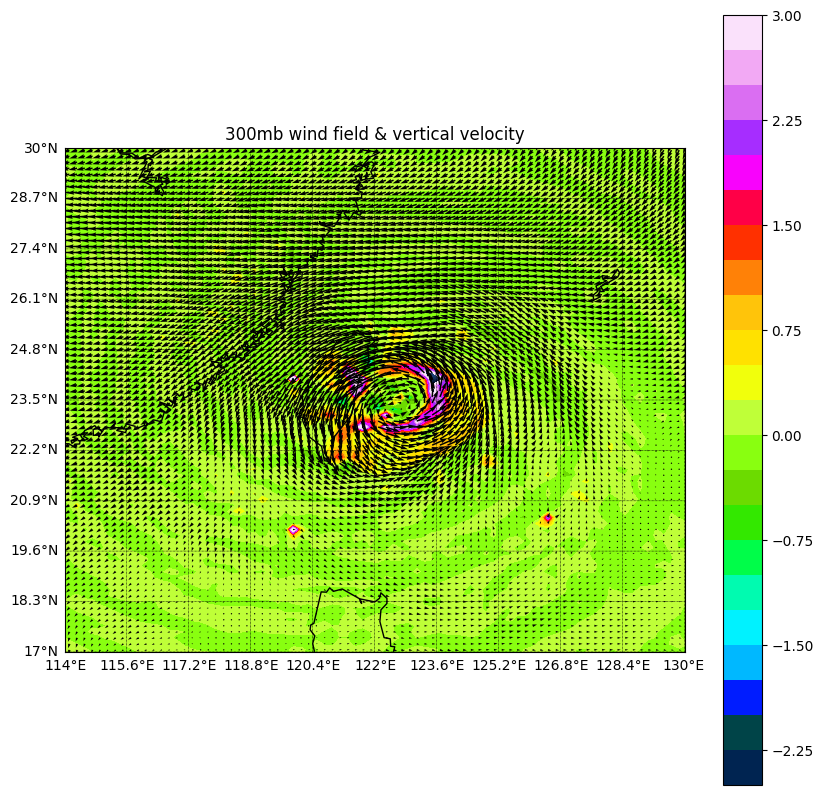

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

class WindFieldVisualizer:
    def __init__(self):
        self.rows = 252
        self.cols = 252
        self.levels = 10
        self.vars = 4
        self.file_name = './data/fanapid.dat'
        self.lat = np.linspace(4, 43, 252)
        self.lon = np.linspace(95, 145, 252)
        self.lonx, self.laty = np.meshgrid(self.lon, self.lat, indexing='xy')
        self.hgt = [1000, 900, 850, 800, 700, 600, 500, 400, 300, 250]
        self.h = [2, 6, 8]
        
    def replace_above_threshold(self, matrix, threshold):
        mask = matrix > threshold
        matrix[mask] = np.nan
        return matrix
    
    def plot_wind_field_vertical_velocity(self):
        data = np.fromfile(self.file_name, dtype='>f4')
        data = data.reshape(self.vars, self.levels, self.rows, self.cols)
        
        u = np.array(data[0])
        v = np.array(data[1])
        w = np.array(data[2])
        t = np.array(data[3])
        
        threshold = 10**10
        u = self.replace_above_threshold(u, threshold)
        v = self.replace_above_threshold(v, threshold)
        w = self.replace_above_threshold(w, threshold)
        t = self.replace_above_threshold(t, threshold)
        
        for i in self.h:
            fig = plt.figure(figsize=(10, 10))
            m = Basemap(llcrnrlon=114, llcrnrlat=17, urcrnrlon=130, urcrnrlat=30, resolution='l')
            m.drawcoastlines()
            m.bluemarble()
            m.drawparallels(np.linspace(17, 30, 11), labels=[1, 0, 0, 0], linewidth=0.5)
            m.drawmeridians(np.linspace(114, 130, 11), labels=[0, 0, 0, 1], linewidth=0.5)
            x, y = m(self.lonx, self.laty)
            level = np.linspace(-2.5, 3, 23)
            p = m.contourf(x, y, w[i, :, :], level, cmap="gist_ncar")
            m.quiver(x, y, u[i, :, :], v[i, :, :],
                     scale=60, scale_units='xy', units='xy')
            plt.colorbar(p)
            plt.grid("--")
            plt.title(str(self.hgt[i]) + "mb wind field & vertical velocity")
            # plt.savefig(f"./imgs/wind_field_vertical_verocity/{str(self.hgt[i])}mb_wind_field_vertical_velocity.jpg", dpi=600)
            
            plt.show()

def main():
    visualizer = WindFieldVisualizer()
    visualizer.plot_wind_field_vertical_velocity()

if __name__ == "__main__":
    main()
